# Exercise with Image Processing


<div class="alert alert-block alert-success">

In this notebook we are going to again build an image classifier using a pre-labelled dataset. However our dataset is now completely different and includes labelled images of animals. There are exercises in this notebook, but we provide the code that enables you to classify an initial set of images.  
    
 - 1) [The dataset](#dataset)
 - 2) [Preprocessing: Reducing the number of input dimensions](#Preprocessing)
 - 3) [Training the classifier](#Training)
 - 4) [Exercises](#Exercises)

If you get to the end of this exercise and fancy something a little more bleeding edge, check out the notebook designed to work on Google's Co-laboratory. Please see the lecture for more details. 

</div>

## 1) The dataset <a name="dataset"></a>

There are a number of datasets of labelled images we could use, but we are somewhat limited by size in this practical. If you do want to replicate this workflow on a larger dataset, I would reccomend searching [Kaggle]() or similar. For now, we are going to use a subset of labelled images from the [Caltech 101 dataset](http://www.vision.caltech.edu/Image_Datasets/Caltech101/)$*$. We have included a number of different animal categories in the repository and, for now, we load images labelled as crab, crayfish and crocodile. 

In the following we load in the relevant images and conert them into greyscale images and then 2D arrays of 300 by 300. The reason for using greyscale is that, in this practical, we do not want to work with 3 seperate 2D arrays that would map to the RGB image format. Since the size of each image varies, we choose a 300 by 300 2D array just to be consistent. 

Once loaded, we print the labels associated with each image in our dataset.

*L. Fei-Fei, R. Fergus and P. Perona. Learning generative visual models from few training examples: an incremental Bayesian approach tested on 101 object categories. IEEE. CVPR 2004, Workshop on Generative-Model
Based Vision. 2004

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
import re
from sklearn import preprocessing
from PIL import Image

import pdb

images = []
labels= []

directory = '../data/images/crab'
for filename in listdir(directory):
    if filename.endswith('.jpg'):
        labels.append('crab')
        img = Image.open(directory+'/'+filename).convert('L').resize((300, 300)) #plt.imread(directory+'/'+filename)
        pixels = np.array(img.getdata()).reshape((img.size[1], img.size[0]))
        images.append(pixels.flatten()/np.max(pixels.flatten()))
directory = '../data/images/crayfish'
for filename in listdir(directory):
    if filename.endswith('.jpg'):
        labels.append('crayfish')
        img = Image.open(directory+'/'+filename).convert('L').resize((300, 300)) #plt.imread(directory+'/'+filename)
        pixels = np.array(img.getdata()).reshape((img.size[1], img.size[0]))
        images.append(pixels.flatten()/np.max(pixels.flatten()))
directory = '../data/images/crocodile'
for filename in listdir(directory):
    if filename.endswith('.jpg'):
        labels.append('crocodile')
        img = Image.open(directory+'/'+filename).convert('L').resize((300, 300)) #plt.imread(directory+'/'+filename)
        pixels = np.array(img.getdata()).reshape((img.size[1], img.size[0]))
        images.append(pixels.flatten()/np.max(pixels.flatten()))

le = preprocessing.LabelEncoder()
le.fit(labels)

print(labels)
#image_array=np.array(images)

['crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crab', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfish', 'crayfi

We can also plot one of the images from our new dataset which, by selecting the 31st entry, should be a crab.

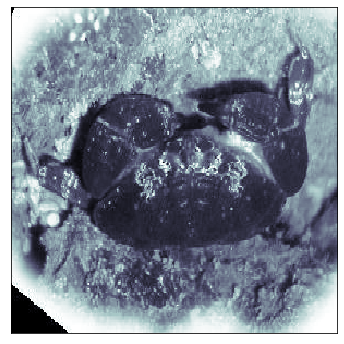

In [2]:
fig = plt.figure(figsize=(8, 6))
# plot several images
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[])
ax.imshow(np.reshape(images[30], (300, 300)), cmap=plt.cm.bone)

As with our previous notebook, we can now split our dataset into a training and testing set.

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(images), np.array(labels), random_state=0)

In [4]:
print(X_train.shape, X_test.shape)

(144, 90000) (49, 90000)


## 2) Preprocessing: Reducing the number of input dimensions <a name="Preprocessing"></a>

Our dataset seems particularly unbalanced when we compare the number of images we have with the number of dimensions we have. This is quite a significant reduction, but let us try to use PCA again to decrease the number of dimensions from 90000 to 100 as oer the code snippet below. Once we make that reduction, we can plot a 'mean' image. Whilst in the previous example we produced an average face, in this example we get an image which has no real discernable features. 

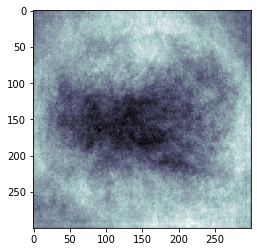

In [5]:
from sklearn import decomposition
pca = decomposition.PCA(n_components=100, whiten=True, svd_solver='randomized')
pca.fit(X_train)
plt.imshow(pca.mean_.reshape(300,300), cmap=plt.cm.bone);

If you recall in the previous notebook, we were able to plot images of our new abstract space [PCA derived] in terms of a rank order of the importance of each feature. What do we take away from the plots below? It seems that the element of centrality on our 2D space is the most important, before we move to finer details.

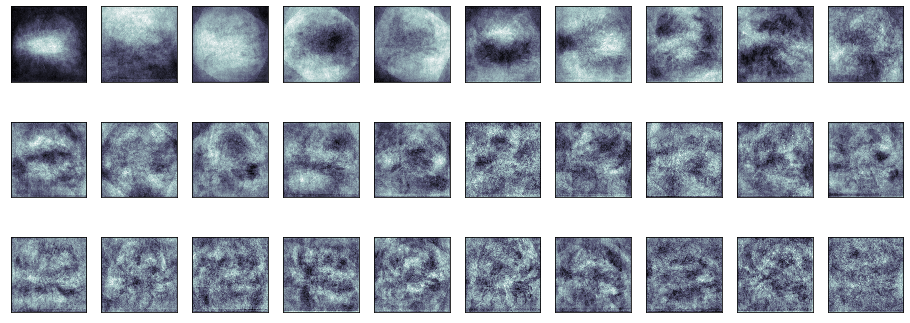

In [6]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(300,300), cmap=plt.cm.bone)

We now need to convert our training and testing data into this new abstract space. 

In [7]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print(X_train_pca.shape)
print(X_test_pca.shape)

(144, 100)
(49, 100)


Before we fit our classifier, let us compare an original image with the same information mapped onto a reduced PCA space.

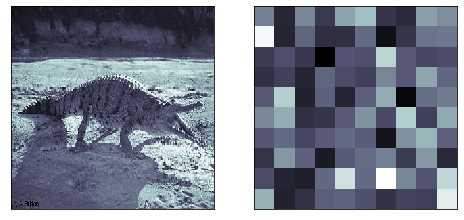

In [8]:
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(1, 2, 1, xticks=[], yticks=[])
ax1.imshow(X_train[0].reshape(300,300), cmap=plt.cm.bone)
ax2 = fig.add_subplot(1, 2, 2, xticks=[], yticks=[])
ax2.imshow(np.reshape(X_train_pca[0], (10, 10)), cmap=plt.cm.bone)

## 3) Training the classifier <a name="Training"></a>

Now we have everything in place to train our classifier and evaluate its performance via a confusion matrix. Can you identify where there are mis-classifications?


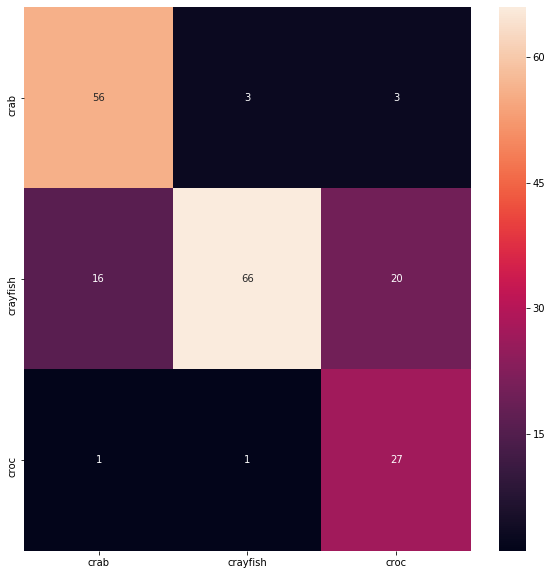

In [9]:
from sklearn import svm
from sklearn import metrics
import seaborn as sn
import pandas as pd

clf = svm.SVC(C=5., gamma=0.001)
clf.fit(X_train_pca, y_train)
y_pred = clf.predict(X_test_pca)

X_total_input = pca.transform(np.array(images))
prediction = clf.predict(X_total_input)
cm=metrics.confusion_matrix(prediction,np.array(labels))

df_cm = pd.DataFrame(cm, index = [i for i in ['crab','crayfish','croc']],
                  columns = [i for i in ['crab','crayfish','croc']])
plt.figure(figsize = (10,10))
sn.heatmap(df_cm, annot=True)
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!
plt.show()


<div class="alert alert-block alert-success">
<b> 4) Exercises </b> <a name="Exercises"></a>

In this notebook, try to work through the following tasks:

1. - Look in the images within the data folder. There are three different animals. What happens to the performance when you swap crayfish fir dolphins?
2. - Since we have split our training and test set, it might be best to ensure we have the same number of distinct categories in both. In the code where we split the data, we can pass an additional option to the function ```train_test_split``` to stratify our data by label. If you pass an extra argument to that function, specifically ```stratify=np.array(labels)```, what impact does this have on model performance?
3. - Can you add a 4th and even 5th category to the notebook?

</div>